In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [5]:
start_date = '2010-01-01'
end_date = '2024-03-31'
symbol = 'MSFT'

data = yf.download(symbol, start=start_date, end=end_date)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.431589,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.439161,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.295313,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.053053,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.212038,51197400


In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.431589,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.439161,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.295313,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.053053,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.212038,51197400


In [7]:

data = data.reset_index()

data = data.drop(['Date','Adj Close'],axis= 1 )

In [8]:
data.head()

,Open,High,Low,Close,Volume
0,30.620001,31.100000,30.590000,30.950001,38409100
1,30.850000,31.100000,30.639999,30.959999,49749600
2,30.879999,31.080000,30.520000,30.770000,58182400
3,30.629999,30.700001,30.190001,30.450001,50559700
4,30.280001,30.879999,30.240000,30.660000,51197400


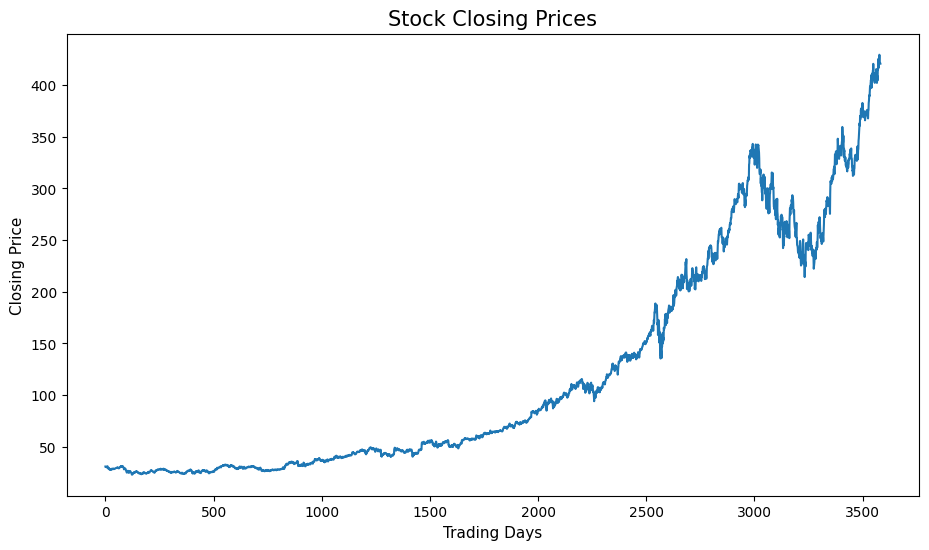

In [9]:
plt.figure(figsize=(11,6))
plt.title('Stock Closing Prices',fontsize = 15)
plt.xlabel('Trading Days',fontsize = 11)
plt.ylabel('Closing Price',fontsize = 11)
plt.plot(data.Close)

In [10]:
moving_average = data.Close.rolling(100).mean()
moving_average

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3578    388.697501
3579    389.553000
3580    390.388401
3581    391.142000
3582    391.866000
Name: Close, Length: 3583, dtype: float64

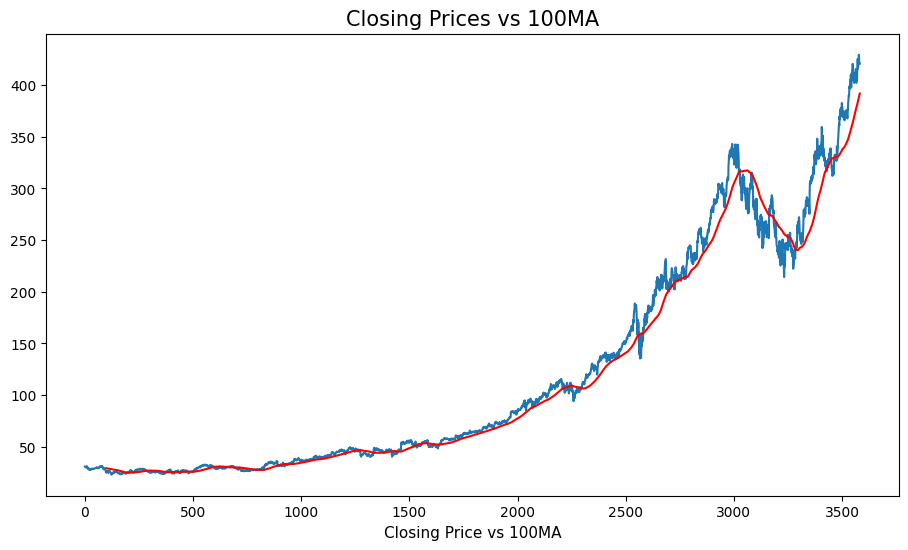

In [11]:
plt.figure(figsize=(11,6))
plt.title('Closing Prices vs 100MA',fontsize = 15)
plt.xlabel('Closing Price vs 100MA',fontsize = 11)
plt.plot(data.Close)
plt.plot(moving_average, 'red')

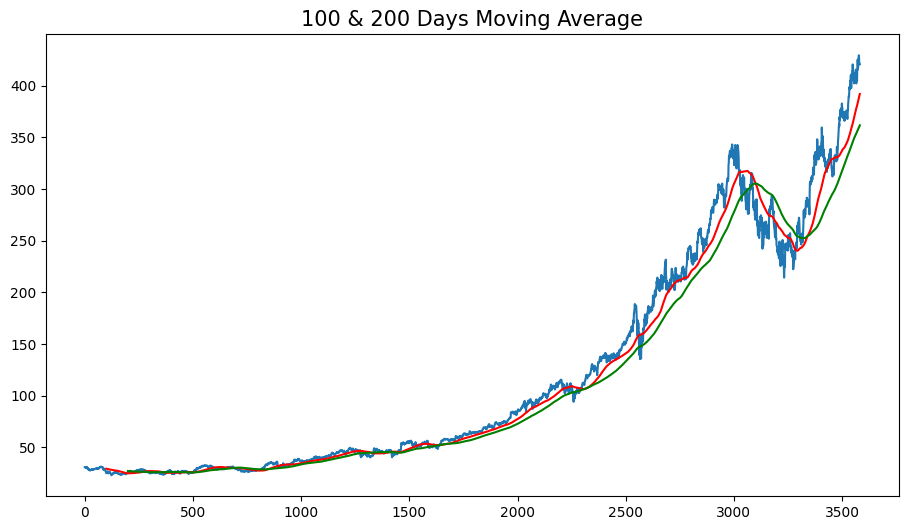

In [12]:
moving_average2 = data.Close.rolling(200).mean()
plt.figure(figsize=(11,6))
plt.title('100 & 200 Days Moving Average',fontsize=15)
plt.plot(data.Close)
plt.plot(moving_average, 'red')
plt.plot(moving_average2, 'green')

In [13]:
data.shape

(3583, 5)

In [14]:

data_training = pd.DataFrame(data['Close'][0: int(len(data) * 0.7)])
data_testing  = pd.DataFrame(data['Close'][int(len(data)*0.7) : int(len(data))])

data_training.head()

,Close
0,30.950001
1,30.959999
2,30.770000
3,30.450001
4,30.660000


In [15]:
data_testing.head()

,Close
2508,155.710007
2509,157.410004
2510,157.410004
2511,157.380005
2512,158.669998


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)

In [18]:
data_training_array

array([[0.05991549],
       [0.05999094],
       [0.0585572 ],
       ...,
       [1.        ],
       [0.99366136],
       [0.99124658]])

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train

array([[[0.05991549],
        [0.05999094],
        [0.0585572 ],
        ...,
        [0.02460006],
        [0.02309085],
        [0.01509206]],

       [[0.05999094],
        [0.0585572 ],
        [0.05614247],
        ...,
        [0.02309085],
        [0.01509206],
        [0.02256263]],

       [[0.0585572 ],
        [0.05614247],
        [0.05772713],
        ...,
        [0.01509206],
        [0.02256263],
        [0.02105342]],

       ...,

       [[0.88424391],
        [0.8929218 ],
        [0.89058255],
        ...,
        [0.97109869],
        [0.98271964],
        [0.99245397]],

       [[0.8929218 ],
        [0.89058255],
        [0.88545131],
        ...,
        [0.98271964],
        [0.99245397],
        [1.        ]],

       [[0.89058255],
        [0.88545131],
        [0.85466349],
        ...,
        [0.99245397],
        [1.        ],
        [0.99366136]]])

In [21]:
y_train

array([0.02256263, 0.02105342, 0.02173256, ..., 1.        , 0.99366136,
       0.99124658])

In [25]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [26]:
model = Sequential()
model.add(LSTM(units=50, activation= 'relu' , return_sequences= True, input_shape= (x_train.shape[1],1) ))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation= 'relu' , return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation= 'relu' , return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation= 'relu'))
model.add(Dropout(0.5))
          
model.add(Dense(units=1))

In [27]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam' , loss='mean_squared_error')
model.fit( x_train, y_train, epochs=50)

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 18s 154ms/step - loss: 0.0557
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 160ms/step - loss: 0.0059
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 159ms/step - loss: 0.0044
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 157ms/step - loss: 0.0038
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 163ms/step - loss: 0.0036
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 161ms/step - loss: 0.0028
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 158ms/step - loss: 0.0030
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 158ms/step - loss: 0.0028
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 162ms/step - loss: 0.0026
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 172ms/step - loss: 0.0026
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 163ms/step - loss: 0.0022
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - loss: 0.0025
Epoch 13/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - loss: 0.0027
Epoch 14/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 154ms/step - loss: 0.0024
Epoch 15/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 

In [29]:
model.save('keras_stock_prediction_model.keras')

In [30]:
prev_100_days = data_training.tail(100)
prev_100_days

,Close
2408,140.350006
2409,136.270004
2410,138.059998
2411,136.899994
2412,132.210007
...,...
2503,153.240005
2504,154.529999
2505,155.529999
2506,154.690002


In [31]:
data_testing.head()

,Close
2508,155.710007
2509,157.410004
2510,157.410004
2511,157.380005
2512,158.669998


In [32]:
new_df = pd.concat([prev_100_days,data_testing], ignore_index=True)
new_df.head()


,Close
0,140.350006
1,136.270004
2,138.059998
3,136.899994
4,132.210007


In [33]:
input_data = scaler.fit_transform(new_df)
input_data

array([[0.02739265],
       [0.01366267],
       [0.01968633],
       ...,
       [0.97402072],
       [0.97328038],
       [0.97089112]])

In [34]:
input_data.shape

(1175, 1)

In [35]:
x_test = []
y_test = []

for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])

In [36]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1075, 100, 1)
(1075,)


In [37]:
y_predicted = model.predict(x_test)
y_predicted.shape

34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step


(1075, 1)

In [38]:
scaler.scale_ 

array([0.00336519])

In [39]:
mul_by_fac = 1 / 0.00682769
y_test = y_test * mul_by_fac
y_predicted = y_predicted * mul_by_fac

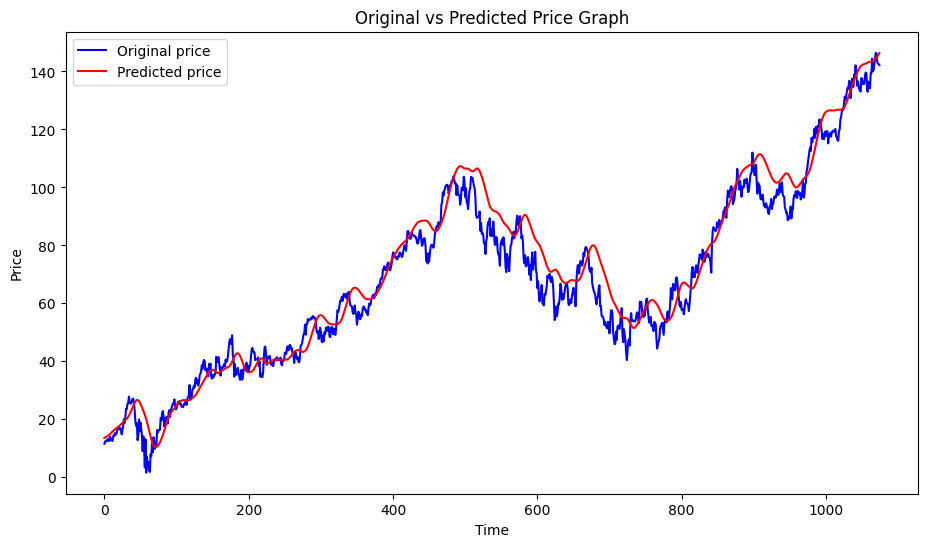

In [40]:
plt.figure(figsize=(11,6))
plt.title('Original vs Predicted Price Graph')
plt.plot(y_test, 'b', label='Original price')
plt.plot(y_predicted, 'r', label='Predicted price')
plt.xlabel('Time' , fontsize = 10)
plt.ylabel('Price', fontsize = 10)
plt.legend()
plt.show()